<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.079360,-0.001017,41.078343,41.078932,-0.000589
1,0.0,1.0,32.548650,-0.000367,42.548283,42.548235,0.000048
2,0.0,2.0,32.484836,0.000313,42.485150,42.484421,0.000729
3,0.0,3.0,84.928955,-0.000096,94.928858,94.928972,-0.000114
4,0.0,4.0,25.136905,-0.000944,35.135962,35.136429,-0.000467
...,...,...,...,...,...,...,...
19995,999.0,15.0,48.844755,0.000150,58.844905,58.844923,-0.000018
19996,999.0,16.0,87.165795,-0.000126,97.165669,97.165762,-0.000092
19997,999.0,17.0,55.833483,-0.000401,65.833082,65.833614,-0.000531
19998,999.0,18.0,50.748144,-0.000519,60.747625,60.748301,-0.000677


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.079360,-0.001017,41.078343,41.078932,-0.000589
1,0.0,1.0,32.548650,-0.000367,42.548283,42.548235,0.000048
2,0.0,2.0,32.484836,0.000313,42.485150,42.484421,0.000729
3,0.0,3.0,84.928955,-0.000096,94.928858,94.928972,-0.000114
4,0.0,4.0,25.136905,-0.000944,35.135962,35.136429,-0.000467
...,...,...,...,...,...,...,...
19995,999.0,15.0,48.844755,0.000150,58.844905,58.844923,-0.000018
19996,999.0,16.0,87.165795,-0.000126,97.165669,97.165762,-0.000092
19997,999.0,17.0,55.833483,-0.000401,65.833082,65.833614,-0.000531
19998,999.0,18.0,50.748144,-0.000519,60.747625,60.748301,-0.000677


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.079360 -0.001017  41.078343  41.078932 -0.000589
      1.0    32.548650 -0.000367  42.548283  42.548235  0.000048
      2.0    32.484836  0.000313  42.485150  42.484421  0.000729
      3.0    84.928955 -0.000096  94.928858  94.928972 -0.000114
      4.0    25.136905 -0.000944  35.135962  35.136429 -0.000467
...                ...       ...        ...        ...       ...
999.0 15.0   48.844755  0.000150  58.844905  58.844923 -0.000018
      16.0   87.165795 -0.000126  97.165669  97.165762 -0.000092
      17.0   55.833483 -0.000401  65.833082  65.833614 -0.000531
      18.0   50.748144 -0.000519  60.747625  60.748301 -0.000677
      19.0   48.038025  0.000017  58.038043  58.038197 -0.000154

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.079360 -0.001017  41.078343  41.078932 -0.000589
      1.0    32.548650 -0.000367  42.548283  42.548235  0.000048
      2.0    32.484836  0.000313  42.485150  42.484421  0.000729
      3.0    84.928955 -0.000096  94.928858  94.928972 -0.000114
      4.0    25.136905 -0.000944  35.135962  35.136429 -0.000467
...                ...       ...        ...        ...       ...
999.0 15.0   48.844755  0.000150  58.844905  58.844923 -0.000018
      16.0   87.165795 -0.000126  97.165669  97.165762 -0.000092
      17.0   55.833483 -0.000401  65.833082  65.833614 -0.000531
      18.0   50.748144 -0.000519  60.747625  60.748301 -0.000677
      19.0   48.038025  0.000017  58.038043  58.038197 -0.000154

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.079360,-0.001017,41.078343,41.078932,-0.000589
1,0.0,1.0,32.548650,-0.000367,42.548283,42.548235,0.000048
2,0.0,2.0,32.484836,0.000313,42.485150,42.484421,0.000729
3,0.0,3.0,84.928955,-0.000096,94.928858,94.928972,-0.000114
4,0.0,4.0,25.136905,-0.000944,35.135962,35.136429,-0.000467
...,...,...,...,...,...,...,...
19995,999.0,15.0,48.844755,0.000150,58.844905,58.844923,-0.000018
19996,999.0,16.0,87.165795,-0.000126,97.165669,97.165762,-0.000092
19997,999.0,17.0,55.833483,-0.000401,65.833082,65.833614,-0.000531
19998,999.0,18.0,50.748144,-0.000519,60.747625,60.748301,-0.000677


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    31.079360 -0.001017  41.078343  41.078932 -0.000589
      1.0    32.548650 -0.000367  42.548283  42.548235  0.000048
      2.0    32.484836  0.000313  42.485150  42.484421  0.000729
      3.0    84.928955 -0.000096  94.928858  94.928972 -0.000114
      4.0    25.136905 -0.000944  35.135962  35.136429 -0.000467
...                ...       ...        ...        ...       ...
999.0 15.0   48.844755  0.000150  58.844905  58.844923 -0.000018
      16.0   87.165795 -0.000126  97.165669  97.165762 -0.000092
      17.0   55.833483 -0.000401  65.833082  65.833614 -0.000531
      18.0   50.748144 -0.000519  60.747625  60.748301 -0.000677
      19.0   48.038025  0.000017  58.038043  58.038197 -0.000154

[20000 rows x 5 columns]

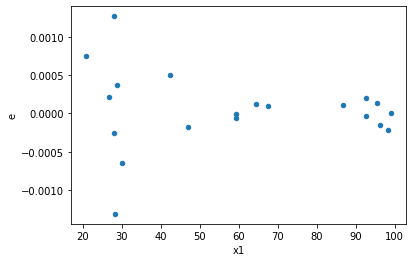

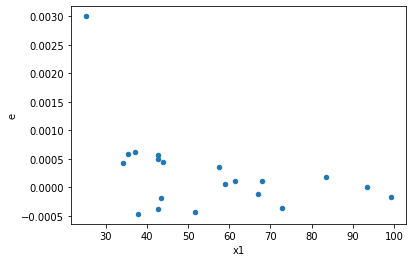

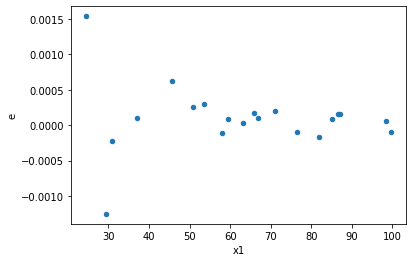

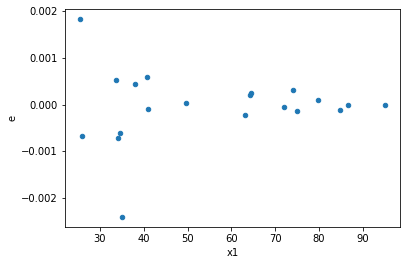

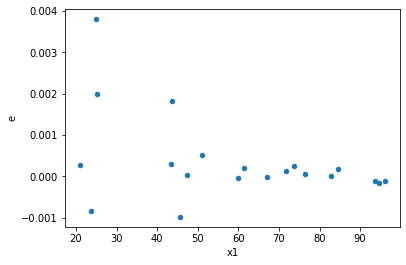

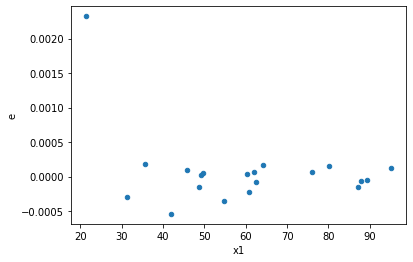

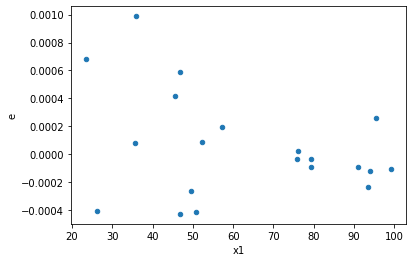

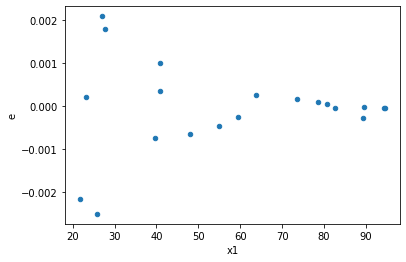

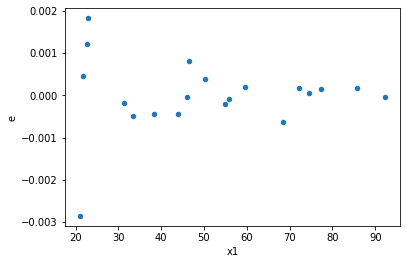

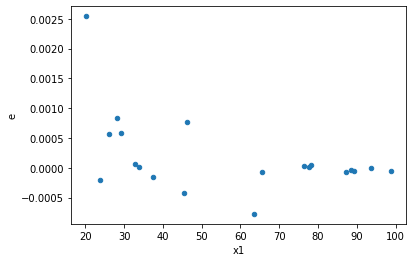

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,3.2938084910374246e-06,8.297708515051906e-08,4.705440701482035e-07,1.1853869307217008e-08,0.025191836555252922,8.256535902123287e-05,Reject005=0 : Heteroscedasticity
1.0,7.0,7.0,9.435286435804174e-07,3.096914914192757e-08,1.3478980622577392e-07,4.42416416313251e-09,0.03282269102547712,0.00020022338114262102,Reject005=0 : Heteroscedasticity
2.0,7.0,7.0,2.6549026049331508e-05,2.9089358766795967e-07,3.7927180070473584e-06,4.1556226809708524e-08,0.010956845916962903,4.833806047458508e-06,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,3.569082693274848e-06,5.1503506426601266e-08,5.098689561821211e-07,7.3576437752287525e-09,0.014430460387944585,1.2438569264985914e-05,Reject005=0 : Heteroscedasticity
4.0,7.0,7.0,1.641202915548421e-05,8.274779616166191e-08,2.3445755936406015e-06,1.1821113737380272e-08,0.005041899169062289,3.2986255899665674e-07,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,9.318406825777731e-06,5.517185883237044e-07,1.3312009751111046e-06,7.881694118910063e-08,0.05920739442256074,0.0013767384521789737,Reject005=0 : Heteroscedasticity
6.0,7.0,7.0,3.481535912282306e-06,4.861056073935398e-07,4.973622731831866e-07,6.944365819907711e-08,0.13962389578652235,0.01868866875154126,Reject005=0 : Heteroscedasticity
7.0,7.0,7.0,1.1350486367955004e-05,1.1754971890327318e-07,1.6214980525650006e-06,1.6792816986181883e-08,0.010356359638926371,3.981237407820357e-06,Reject005=0 : Heteroscedasticity
8.0,7.0,7.0,1.676571734090673e-06,1.2554220299959482e-07,2.3951024772723904e-07,1.7934600428513547e-08,0.07488030511720722,0.002892844998827002,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    957
Reject005=1 : Homoscedasticity       43
Name: Result_test, dtype: int64